
Throughout my time at UVA, a the idea of some sort of math course with a computational piece has increasingly crossed my mind. It would be small and low-stakes, perhaps one credit, but it would be greatly useful, especially in its capacity to act as a refresher *before* students see P Chem (I say this as a P Chem TA who believes the biggest hurdle to student success was lack of math familiarity). This Jupyter Notebook was created to pitch an idea of such a course was also demostrating its potential efficacy as the main tool for instruction and learning. I believe this to be an attractive option due to its ability to couple code and text, seemlessly integrating the two. To quote a [pdf](https://www.birmingham.ac.uk/Documents/college-eps/college/stem/Student-Summer-Education-Internships/Maths-for-Chemists-Booklet.pdf) I found that goes through a math for chemistry class content that might be a useful resource:

> Mathematics is an essential and integral component of all of the scientific disciplines, and its applications within chemistry are numerous and widespread. Mathematics allows a chemist to understand
a range of important concepts, model physical scenarios, and solve problems. In your pre-university
studies it is likely you have already encountered the use of mathematics within chemistry, for example
the use of ratios in mixing solutions and making dilutions or the use of logarithms in understanding
the pH scale. As you move through your university studies you will see mathematics increasingly
used to explain chemistry concepts in more sophisticated ways, for example the use of vectors in
understanding the structures of crystals, or numerical approximations of ordinary differential equations (ODEs) in kinetics to predict the rates and mechanisms of chemical reactions. The ability to
understand and apply mathematics will be important regardless of the branch of chemistry you are
studying, be it the more traditional areas of inorganic, organic and physical chemistry or some of
the newer areas of the subject such as biochemistry, analytical and environmental chemistry.

To advocate for "code literacy," the world is advancing at a rapid pace in no small part to technological advances contingent on code (phrases like *machine learning* and *artificial intelligence* grow increasingly ubiquitious as time passes). To this end, I believe it is paramount to equip chemistry students with some ability to read and write code at a basic level, even if they are a practicing bench chemist. As I descend from my soapbox, I begin some actual content that could make its way into the course if it comes to fruition.

### TOC:
* [Introduction to Programming](#first-bullet)
    * [Types in Python](#first-first-bullet)
    * [Variables and Loops](#first-second-bullet)
* [Calculus](#second-bullet)
* [Linear Algebra](#third-bullet)
* [Miscellaenous but Cool](#fourth-bullet)

# $\S 1.$ Introduction to Python <a class="anchor" id="first-bullet"></a>

Python is, perhaps, the most popular programming language right now due to its wide variety of features, the community that supports it, and a general ease of learning due to how readable the code is. Jupyter notebooks interface with a Python **interpreter** in order to run Python code. As a time honored tradition, the first piece of code one should run is printing `hello world` out to the console.

In [1]:
print('hello world')

hello world


It's important to note that `print` is a keyword in Python that allows us to visualize things to the console. Although it may seem basic, it's a deeply important tool that can often help us figure out where code deviates from that which we intend it to do.

## Types in Python <a class="anchor" id="first-first-bullet"></a>

The idea of a "type" is not unique to Python. Instead, it's a word used to generally describe how data is represented in your machine. For the sake of this document, strings, integers, floating points, lists, and arrays will be the ones we discuss here that are common to most other langauges. The outlier will be a "dataframe" but we'll return to that later. Let's look at some examples:

In [9]:
print("Type I:", type("hello world"))
print("Type II:", type(5000))
print("Type III:", type(5000.))
print("Type IIII:", type(['hello world', 5000, 5000.]))

Type I: <class 'str'>
Type II: <class 'int'>
Type III: <class 'float'>
Type IIII: <class 'list'>


To get arrays, we'll have to `import` a Python library named `NumPy`. Libraries in Python are stored within your machines, but they can't be accessed by a program unless they are imported. This keeps Python very lean as you can control whatever you wish to use. When importing libraries, you can give it a shorter name (analagous to a nickname) for easier referencing when you use on of its features. NumPy is commonly imported as `np` though it can be whatever you wish.

In [12]:
import numpy as np

print(type(np.arange(0, 2, 1)))

<class 'numpy.ndarray'>


## Variables and Loops <a class="anchor" id="first-second-bullet"></a>

In mathematics, one might see the symbol '$\equiv$' used to mean something is *defined* as something. In thermodynamics, $\beta \equiv \frac{1}{k_B T}$ means that $\beta$ is defined to be reciprocal temperature multiplied by one over the Boltzmann constant. In code, the '=' holds the same meaning.

In [13]:
x = 5

print(x)

5


In the block above, we've defined x to be 5. Consequently, we can change this however we see fit while also defining any `type` to a variable. 

In [15]:
new_int = 5
new_float = 5.0
new_list = [5, 5.0]
new_array = np.arange(5, 6, 1)

print("New Int:", new_int)
print("New Float:", new_float)
print("New List:", new_list)
print("New Array:", new_array)

New Int: 5
New Float: 5.0
New List: [5, 5.0]
New Array: [5]


We can perform operations on and/or variables as well.

In [18]:
print(x+new_int)

b = np.arange(1, 21, 1) # create an array from 1 to 21 in increments of 1

print(b)

print(np.sqrt(b))

10
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[1.         1.41421356 1.73205081 2.         2.23606798 2.44948974
 2.64575131 2.82842712 3.         3.16227766 3.31662479 3.46410162
 3.60555128 3.74165739 3.87298335 4.         4.12310563 4.24264069
 4.35889894 4.47213595]


Suppose you had a repeated action. Rather than doing it by hand, you can use a `loop`. The two common ones are `for` and `while` loops, each of which run based on a certain condition. For while loops in particular, it's important to make sure your ending condition can be met, or else the loop will run forever.

In [26]:
print("Results of For Loop:\n")  # \n here creates a new line when printing

for i in range(5):
    print(i)


print("\nResults of While Loop: \n") 
counter = 0

while counter < 5:
    print(counter)
    counter += 1

Results of For Loop:

0
1
2
3
4

Results of While Loop: 

0
1
2
3
4


# $\S 2.$ Calculus <a class="anchor" id="second-bullet"></a>

The package `SymPy` allows for symbolic calculus to be performed right here on your machine. Numerical forms of this are also possible, but we'll start with what you might be used to seeing.

In [27]:
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

In [28]:
diff(cos(x), x)

In [29]:
diff(exp(x**2), x)

In [30]:
diff(x**4, x, 3) # third derivative of x^4

In [31]:
integrate(cos(x), x)

In [33]:
integrate(exp(-x), (x, 0, oo)) # integrate e^-x from 0 to infinity 

In [36]:
integrate(exp(-x**2), (x, -oo, oo)) # integrate single Gaussian, a common integral in quantum mechanics

In [37]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo)) # integrate double Gaussian

# $\S 3.$ Linear Algebra <a class="anchor" id="third-bullet"></a>

Matrix and vector addition proceeds element-by-element. 

$$ \vec{a} + \vec{b} = \begin{bmatrix} a_1 + b_1 \\ a_2 + b_2 \\ \vdots \\ a_n + b_n \end{bmatrix} $$
Here, we see it's necessary for the vectors to have the same number of entries for the procedure to be defined. Subtraction works the same way, just flipping the sign of each element in the second vector. 

Matrix multiplication isn't quite as intuitive, however we showed how it arises naturally when one considers representing a system of equations using matrices and vectors, and how one can recover that system through matrix multiplication. The formula is as follows:

$$ \sum_j A_{ij} B_{jk} = C_{ik} $$
Here, the first subscript corresponds to the number of rows while the second describes the number of columns. Since we sum along *j*, we see that the first matrix must have the same number of columns as the second one has rows. Pictorially, we can see it below:

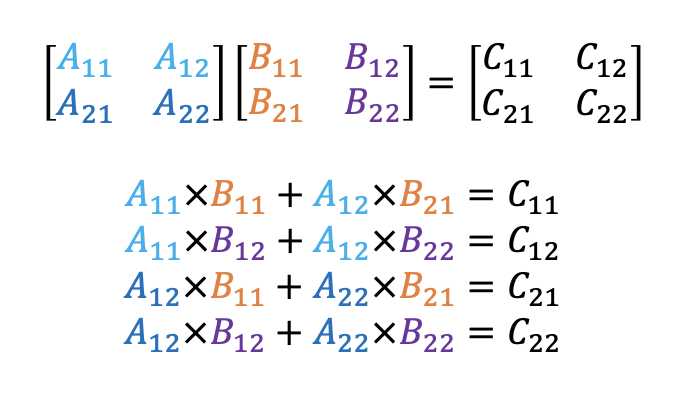

In [38]:
from IPython.display import display, Image

display(Image(filename="/Users/mohan/Desktop/Misc/stemva/linalg_talk/matmul.png", height = 600, width = 600))

In [48]:
A = np.random.randint(5, size = 4).reshape(2,2)
c = np.random.randint(5, size = 2).reshape(2,1)
v = np.array([1, 1])

A_sym = Matrix(A)
c_sym = Matrix(c)
v_sym = Matrix(v)

w = A @ v

A_sym, v_sym, A_sym*v_sym, c_sym # sympy matrix multiplication works using "*"

⎛⎡1  4⎤  ⎡1⎤  ⎡5⎤  ⎡0⎤⎞
⎜⎢    ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥⎟
⎝⎣3  2⎦  ⎣1⎦  ⎣5⎦  ⎣4⎦⎠

Matrix: 
 [[1 4]
 [3 2]]
Initial Vector: [1 1]
New Vector: [5 5]
Non-Matmul Product: 
 [[ 0  0]
 [12  8]]


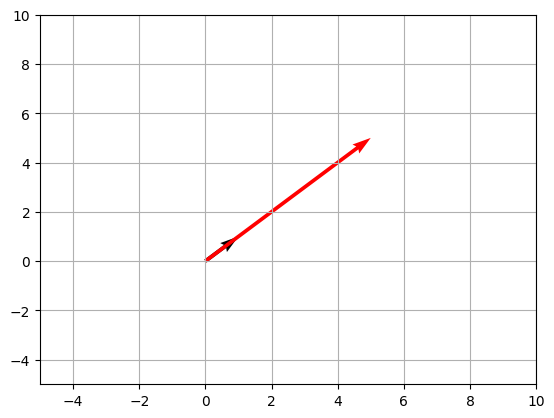

In [49]:
import matplotlib.pyplot as plt

print("Matrix: \n", A)
print("Initial Vector:", v)
print("New Vector:", A @ v) # All other matrix multiplcation works using "@", "np.matmul", or "np.dot"; try it here!

print("Non-Matmul Product: \n", A*c) # "*" performs element wise multiplication between matrices/vectors which differs from an inner product

fig, ax = plt.subplots()
ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='k')
ax.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='r')
ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])
plt.grid()
plt.show()

# $\S 4.$ Miscellaneous but Cool <a class="anchor" id="fourth-bullet"></a>

Attached below is code to look up any chemical compound in the PubChem data base and calculate how many C-H bonds it has.

In [52]:
import requests
import pubchempy as pcp
import numpy as np


name = 'palmitic acid'
cas_num = '57-10-3'

def get_cid(number):
    '''
    Returns CID number from CAS 
    '''
    r = requests.get('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/'+number+'/cids/TXT') 
    print(r.text)
    return r

def ch_bond_finder(compound):
    results = pcp.get_compounds(compound, 'name')
    data = results[0].to_dict(properties=['atoms', 'bonds']) # results itself is a list, so you have to grab the 'compound' data type within the list
    aid_carbon = [] # store atomic id's for all carbon atoms present in the compound when looking at the atom data
    aid_hydrogen = [] # store atomic id's for all hydrogen atoms present in the compound when looking at the atom data

    for i in range(len(data['atoms'])): # iterate thru all atoms in compounds
        atom_values = data['atoms'][i].values() # grab relevant atom data 
        atom_name = list(atom_values)[2] # turn the values of the dictionary into a list so they can be indexed
        if atom_name == 'C':
            aid_carbon.append(list(atom_values)[0]) # append atomic id to appropriate list
        elif atom_name == 'H':
            aid_hydrogen.append(list(atom_values)[0]) # append atomic id to appropriate list
        
    num_ch_bonds = 0

    for i in range(len(data['bonds'])): # iterate thru all atoms in compounds
        bond_values = data['bonds'][i].values() # the bonds dictionary lists atom 1 [0], atom 2 [1], and the order of the bond [3]
        if list(bond_values)[0] in aid_carbon and list(bond_values)[1] in aid_hydrogen and list(bond_values)[2] == 1: # Non-Hydrogen atoms are always listed first (indexed by 0), so check if there is a C-H bond of order 1
            num_ch_bonds += 1

    return num_ch_bonds
        

num_ch_bonds = ch_bond_finder(name)

print("There are {} C-H bonds in {}.".format(num_ch_bonds, name))

num_ch_bonds = ch_bond_finder(cas_num)

print("There are {} C-H bonds in the compound.".format(num_ch_bonds))
        

There are 31 C-H bonds in palmitic acid.
There are 31 C-H bonds in the compound.
